In [1]:
def CountFrequency(my_list): 
    # Creating an empty dictionary  
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
    return freq 

In [2]:
import pandas as pd 
import numpy as np
import test_cleaner
import ppscore as pps
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error 
import re
%matplotlib inline
import test_cleaner

In [14]:
fb = pd.read_csv('fb_story_withBOG.csv').drop(columns = ['Unnamed: 0'])
fb['publish_date'] = pd.to_datetime(fb['publish_date'])
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4053 entries, 0 to 4052
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   stories_id       4053 non-null   int64         
 1   publish_date     4053 non-null   datetime64[ns]
 2   title            4053 non-null   object        
 3   url              4053 non-null   object        
 4   language         4053 non-null   object        
 5   ap_syndicated    4053 non-null   bool          
 6   themes           793 non-null    object        
 7   media_id         4053 non-null   int64         
 8   media_name       4053 non-null   object        
 9   media_url        4053 non-null   object        
 10  title_FB_only    4053 non-null   object        
 11  scraped_article  4053 non-null   object        
 12  BOG              4053 non-null   object        
dtypes: bool(1), datetime64[ns](1), int64(2), object(9)
memory usage: 384.1+ KB


In [17]:
# Number of languages 
print(fb_tw['language'].unique())
print(fb['language'].unique())

['en' 'de' 'pt' 'tl' 'fr' 'zh' 'es']


In [15]:
fb.head()

stories_id        publish_date  \
0  1248303072 2015-07-01 17:33:07   
1  1248308328 2015-07-02 15:12:28   
2   636875666 2015-07-05 16:50:00   
3   637006813 2015-07-16 20:43:19   
4  1248301115 2015-07-20 09:48:21   

                                               title  \
0  Facebook Will Reap Substitution of TV by Digit...   
1  Yelp Tumbles 11%: Google, Facebook Copying, No...   
2  Facebook and birthday cake top this week's cri...   
3  Peru swimmer admits on Facebook to positive do...   
4  Google, Facebook, Amazon, Apple in ‘Strange Di...   

                                                 url language  ap_syndicated  \
0  http://blogs.barrons.com/techtraderdaily/2015/...       en          False   
1  http://blogs.barrons.com/techtraderdaily/2015/...       en          False   
2  http://feeds.reuters.com/~r/reuters/USVideoMos...       en          False   
3  http://feeds.reuters.com/~r/reuters/sportsNews...       en          False   
4  http://blogs.barrons.com/techtraderdaily/2015/...       en          False   

                                              themes  media_id  \
0                                                NaN     33038   
1                                                NaN     33038   
2  crime and criminals, murders and attempted mur...      4442   
3                                                NaN      4442   
4                                                NaN     33038   

          media_name                        media_url  \
0  blogs.barrons.com  http://blogs.barrons.com#spider   
1  blogs.barrons.com  http://blogs.barrons.com#spider   
2            Reuters           http://www.reuters.com   
3            Reuters           http://www.reuters.com   
4  blogs.barrons.com  http://blogs.barrons.com#spider   

                                       title_FB_only  \
0  Facebook Will Reap Substitution of TV by Digit...   
1  Yelp Tumbles 11%: Google, Facebook Copying, No...   
2  Facebook and birthday cake top this week's cri...   
3  Peru swimmer admits on Facebook to positive do...   
4  Google, Facebook, Amazon, Apple in ‘Strange Di...   

                                     scraped_article  \
0  Cantor Fitzgerald's Youssef Squali today reite...   
1  Shares of online local listings and review sit...   
2  Facebook and birthday cake top this week's cri...   
3  Peru swimmer admits on Facebook to positive do...   
4  CNBC’s Bob Pisani had an interesting bit a sho...   

                                                 BOG  
0  ['cantor', 'fitzgeralds', 'youssef', 'squali',...  
1  ['share', 'online', 'local', 'listing', 'revie...  
2  ['facebook', 'birthday', 'cake', 'top', 'week'...  
3  ['peru', 'swimmer', 'admit', 'facebook', 'posi...  
4  ['cnbcs', 'bob', 'pisani', 'interesting', 'bit...

In [2]:
fb_tw = pd.read_csv('fb_twitter_processed.csv').drop(columns = ['Unnamed: 0'])
fb_tw['publish_date'] = pd.to_datetime(fb_tw['publish_date'])
fb_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3754 entries, 0 to 3753
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   publish_date              3753 non-null   datetime64[ns]
 1   cleaned_title_fb_removed  3754 non-null   object        
 2   date                      3753 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 88.1+ KB


In [9]:
fb_tw['cleaned_title_fb_removed'][2]

"['pankaj', 'pachauri', 'twitter', 'quota', 'tax', 'questionredditindia', 'yo', 'facebook', 'googleindia', 'support', 'netneutrality', 'usa', 'would', 'not', 'support', 'indiaquot']"

In [10]:
forbidden_list = ['facebook ','fb ','twitter ','facebook','fb','twitter']
fb_tw['cleaned_title_fb_removed_'] = fb_tw['cleaned_title_fb_removed'].apply(lambda x: test_cleaner.list_generator(x,forbidden_list))

In [11]:
fb_tw['cleaned_title_fb_removed_'][2]

['pankaj',
 'pachauri',
 'quota',
 'tax',
 'questionredditindia',
 'yo',
 'googleindia',
 'support',
 'netneutrality',
 'usa',
 'would',
 'not',
 'support',
 'indiaquot']

### TF-IDF

In [6]:
def CountFrequency(my_list): 
    # Creating an empty dictionary  
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
    return freq 

In [8]:
def text_transformer(x,df):
    temp_dic = CountFrequency(x)  
    for key in temp_dic.keys(): 
       df[key] = x.count(key)
    return df

In [9]:
BOG = []
for i,r in fb_tw.iterrows(): 
    print(i)
    temp = r['cleaned_title_fb_removed_']
    BOG += temp 
    temp_dic = CountFrequency(temp) 
    for key in temp_dic.keys(): 
        fb_tw.at[i,key] = temp_dic[key]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [10]:
fb_tw.head()

publish_date                           cleaned_title_fb_removed  \
0 2015-01-07 12:32:58  ['telesur', 'tv', 'twitter', 'quotel', 'festiv...   
1 2015-04-13 00:53:08  ['reddit', 'india', 'twitter', 'quotreliancemo...   
2 2015-04-12 06:08:23  ['pankaj', 'pachauri', 'twitter', 'quota', 'ta...   
3 2015-04-11 10:34:25  ['vishal', 'dadlani', 'twitter', 'quotis', 'hi...   
4 2015-04-27 22:51:07  ['cathy', 'young', 'twitter', 'quotradiofreeto...   

         date                          cleaned_title_fb_removed_  telesur  \
0  2015-01-07  [telesur, tv, twitter, quotel, festival, de, c...      1.0   
1  2015-04-13  [reddit, india, twitter, quotreliancemobile, w...      NaN   
2  2015-04-12  [pankaj, pachauri, twitter, quota, tax, questi...      NaN   
3  2015-04-11  [vishal, dadlani, twitter, quotis, hindi, medi...      NaN   
4  2015-04-27  [cathy, young, twitter, quotradiofreetom, juli...      NaN   

    tv  twitter  quotel  festival   de  ...  uniquely  unqualified  \
0  1.0      1.0     1.0       1.0  1.0  ...       NaN          NaN   
1  NaN      1.0     NaN       NaN  NaN  ...       NaN          NaN   
2  NaN      1.0     NaN       NaN  NaN  ...       NaN          NaN   
3  NaN      1.0     NaN       NaN  NaN  ...       NaN          NaN   
4  NaN      1.0     NaN       NaN  NaN  ...       NaN          NaN   

   julietteburton  soozuk  thegmorrell  tiernandouieb  nextupcomedy  hourpm  \
0             NaN     NaN          NaN            NaN           NaN     NaN   
1             NaN     NaN          NaN            NaN           NaN     NaN   
2             NaN     NaN          NaN            NaN           NaN     NaN   
3             NaN     NaN          NaN            NaN           NaN     NaN   
4             NaN     NaN          NaN            NaN           NaN     NaN   

   donations  navigate  
0        NaN       NaN  
1        NaN       NaN  
2        NaN       NaN  
3        NaN       NaN  
4        NaN       NaN  

[5 rows x 13870 columns]

In [11]:
fb_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3754 entries, 0 to 3753
Columns: 13870 entries, publish_date to navigate
dtypes: datetime64[ns](1), float64(13866), object(3)
memory usage: 397.2+ MB


In [36]:
fb_tw['cleaned_title_fb_removed'][0][2:-2]

"telesur', 'tv', 'twitter', 'quotel', 'festival', 'de', 'cannes', 'en', 'su', 'facebook', 'fdcofficiel', 'jesuischarlie', 'en', 'solidaridad', 'por', 'charliehebdo', 'httptcowngjdimhquot"

In [4]:
df = pd.read_csv('fb_story_withBOG.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4053 entries, 0 to 4052
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       4053 non-null   int64 
 1   stories_id       4053 non-null   int64 
 2   publish_date     4053 non-null   object
 3   title            4053 non-null   object
 4   url              4053 non-null   object
 5   language         4053 non-null   object
 6   ap_syndicated    4053 non-null   bool  
 7   themes           793 non-null    object
 8   media_id         4053 non-null   int64 
 9   media_name       4053 non-null   object
 10  media_url        4053 non-null   object
 11  title_FB_only    4053 non-null   object
 12  scraped_article  4053 non-null   object
 13  BOG              4053 non-null   object
dtypes: bool(1), int64(3), object(10)
memory usage: 415.7+ KB


In [6]:
df.head()

Unnamed: 0  stories_id                publish_date  \
0       11775  1248303072  2015-07-01 17:33:07.000000   
1       11587  1248308328  2015-07-02 15:12:28.000000   
2        2483   636875666  2015-07-05 16:50:00.000000   
3        2570   637006813  2015-07-16 20:43:19.000000   
4       11794  1248301115  2015-07-20 09:48:21.000000   

                                               title  \
0  Facebook Will Reap Substitution of TV by Digit...   
1  Yelp Tumbles 11%: Google, Facebook Copying, No...   
2  Facebook and birthday cake top this week's cri...   
3  Peru swimmer admits on Facebook to positive do...   
4  Google, Facebook, Amazon, Apple in ‘Strange Di...   

                                                 url language  ap_syndicated  \
0  http://blogs.barrons.com/techtraderdaily/2015/...       en          False   
1  http://blogs.barrons.com/techtraderdaily/2015/...       en          False   
2  http://feeds.reuters.com/~r/reuters/USVideoMos...       en          False   
3  http://feeds.reuters.com/~r/reuters/sportsNews...       en          False   
4  http://blogs.barrons.com/techtraderdaily/2015/...       en          False   

                                              themes  media_id  \
0                                                NaN     33038   
1                                                NaN     33038   
2  crime and criminals, murders and attempted mur...      4442   
3                                                NaN      4442   
4                                                NaN     33038   

          media_name                        media_url  \
0  blogs.barrons.com  http://blogs.barrons.com#spider   
1  blogs.barrons.com  http://blogs.barrons.com#spider   
2            Reuters           http://www.reuters.com   
3            Reuters           http://www.reuters.com   
4  blogs.barrons.com  http://blogs.barrons.com#spider   

                                       title_FB_only  \
0  Facebook Will Reap Substitution of TV by Digit...   
1  Yelp Tumbles 11%: Google, Facebook Copying, No...   
2  Facebook and birthday cake top this week's cri...   
3  Peru swimmer admits on Facebook to positive do...   
4  Google, Facebook, Amazon, Apple in ‘Strange Di...   

                                     scraped_article  \
0  Cantor Fitzgerald's Youssef Squali today reite...   
1  Shares of online local listings and review sit...   
2  Facebook and birthday cake top this week's cri...   
3  Peru swimmer admits on Facebook to positive do...   
4  CNBC’s Bob Pisani had an interesting bit a sho...   

                                                 BOG  
0  ['cantor', 'fitzgeralds', 'youssef', 'squali',...  
1  ['share', 'online', 'local', 'listing', 'revie...  
2  ['facebook', 'birthday', 'cake', 'top', 'week'...  
3  ['peru', 'swimmer', 'admit', 'facebook', 'posi...  
4  ['cnbcs', 'bob', 'pisani', 'interesting', 'bit...

In [7]:
BOG = []
for i,r in df.iterrows(): 
    BOG.append(test_cleaner.text_pipline(r['scraped_article']))
print(len(BOG))

4053


In [8]:
BOG_list = []
for i in range(len(BOG)): 
    for j in range(len(BOG[i])): 
        BOG_list.append(BOG[i][j])
print(len(BOG_list))

296797


### Prediction power test if we do not delete the facebook/fb 

In [79]:
df.to_csv('df_stroy__with_BOG_columns.csv')

In [9]:
df = pd.read_csv('df_stroy__with_BOG_columns.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'stories_id', 'publish_date', 'title',
       'url', 'language', 'ap_syndicated', 'themes', 'media_id',
       ...
       'pandemicfuele', 'resultsrbc', 'opportunistic', 'advertiserwhile',
       'leases', 'vornados', 'farley', 'centerpiece', 'vno', 'cookson'],
      dtype='object', length=21667)

In [4]:
df_condensed = df.drop(columns = ['Unnamed: 0','Unnamed: 0.1','title','url','language',
                                  'ap_syndicated','themes','media_id','media_url',
                                  'title_FB_only','scraped_article','BOG'])
df_condensed.publish_date = pd.to_datetime(df_condensed.publish_date)

In [5]:
df_condensed['date'] = df_condensed['publish_date'].apply(lambda x: x.date())

In [6]:
l = df_condensed.columns

In [7]:
df_condensed = df_condensed.fillna(0)

In [8]:
df_BOG_pure = df_condensed.groupby('date')[list(l)[3:]].sum().drop(columns = ['facebook','fb'])
df_BOG_pure.head()

cantor  fitzgeralds  youssef  squali  today  reiterate  buy  \
date                                                                      
2015-07-01     1.0          1.0      1.0     2.0    3.0        1.0  1.0   
2015-07-02     0.0          0.0      0.0     0.0    0.0        0.0  0.0   
2015-07-05     0.0          0.0      0.0     0.0    0.0        0.0  0.0   
2015-07-16     0.0          0.0      0.0     0.0    0.0        0.0  0.0   
2015-07-20     0.0          0.0      0.0     0.0    1.0        0.0  0.0   

            rating  share  raise  ...  pandemicfuele  resultsrbc  \
date                              ...                              
2015-07-01     1.0    5.0    2.0  ...            0.0         0.0   
2015-07-02     1.0    1.0    0.0  ...            0.0         0.0   
2015-07-05     0.0    0.0    0.0  ...            0.0         0.0   
2015-07-16     0.0    0.0    0.0  ...            0.0         0.0   
2015-07-20     0.0    0.0    0.0  ...            0.0         0.0   

            opportunistic  advertiserwhile  leases  vornados  farley  \
date                                                                   
2015-07-01            0.0              0.0     0.0       0.0     0.0   
2015-07-02            0.0              0.0     0.0       0.0     0.0   
2015-07-05            0.0              0.0     0.0       0.0     0.0   
2015-07-16            0.0              0.0     0.0       0.0     0.0   
2015-07-20            0.0              0.0     0.0       0.0     0.0   

            centerpiece  vno  cookson  
date                                   
2015-07-01          0.0  0.0      0.0  
2015-07-02          0.0  0.0      0.0  
2015-07-05          0.0  0.0      0.0  
2015-07-16          0.0  0.0      0.0  
2015-07-20          0.0  0.0      0.0  

[5 rows x 21649 columns]

In [10]:
finance_wiki = pd.read_csv('financial_wiki_2017_07_08.csv')

In [9]:
df_BOG_pure.index = pd.to_datetime(df_BOG_pure.index)

In [11]:
finance_wiki = finance_wiki.set_index('Date')
finance_wiki.head()

Facebook.wiki  Google.wiki  Microsoft.wiki         FB       GOOGL  \
Date                                                                            
2015-07-08          45403        45521           10472  85.650002  541.700012   
2015-07-09          47202        43295            9806  85.879997  544.650024   
2015-07-10          46622        42652            7816  87.949997  556.109985   
2015-07-13          47063        44437            7857  90.099998  571.729980   
2015-07-14          44508        45269            7314  89.680000  584.179993   

                 MSFT  FB_return  FB_change  GOOGL_return  GOOGL_change  ...  \
Date                                                                     ...   
2015-07-08  39.941715  -0.018000       -1.0     -0.015145          -1.0  ...   
2015-07-09  40.194511   0.002685        0.0      0.005446           0.0  ...   
2015-07-10  40.275764   0.024103        1.0      0.021041           1.0  ...   
2015-07-13  41.115414   0.024446        1.0      0.028088           1.0  ...   
2015-07-14  41.187630  -0.004661        0.0      0.021776           1.0  ...   

            Microsoft.wiki_t-3  FB_return_t-1  FB_return_t-2  FB_return_t-3  \
Date                                                                          
2015-07-08              7671.0      -0.003769       0.002979       0.004372   
2015-07-09              7491.0      -0.018000      -0.003769       0.002979   
2015-07-10              7518.0       0.002685      -0.018000      -0.003769   
2015-07-13             10472.0       0.024103       0.002685      -0.018000   
2015-07-14              9806.0       0.024446       0.024103       0.002685   

            GOOGL_return_t-1  GOOGL_return_t-2  GOOGL_return_t-3  \
Date                                                               
2015-07-08          0.008083         -0.003143          0.007436   
2015-07-09         -0.015145          0.008083         -0.003143   
2015-07-10          0.005446         -0.015145          0.008083   
2015-07-13          0.021041          0.005446         -0.015145   
2015-07-14          0.028088          0.021041          0.005446   

            MSFT_return_t-1  MSFT_return_t-2  MSFT_return_t-3  
Date                                                           
2015-07-08        -0.002027        -0.000225        -0.001125  
2015-07-09        -0.001354        -0.002027        -0.000225  
2015-07-10         0.006329        -0.001354        -0.002027  
2015-07-13         0.002021         0.006329        -0.001354  
2015-07-14         0.020848         0.002021         0.006329  

[5 rows x 30 columns]

In [12]:
fb_cols = []
for col in list(finance_wiki.columns):
    if col in ['Facebook.wiki', 'Google.wiki' ,'Microsoft.wiki','GOOGL','MSFT','FB_return',
               'GOOGL_return','GOOGL_change','MSFT_return','MSFT_change']: 
        pass 
    else: 
        fb_cols.append(col)
fb_cols   

['FB',
 'FB_change',
 'Facebook.wiki_t-1',
 'Facebook.wiki_t-2',
 'Facebook.wiki_t-3',
 'Google.wiki_t-1',
 'Google.wiki_t-2',
 'Google.wiki_t-3',
 'Microsoft.wiki_t-1',
 'Microsoft.wiki_t-2',
 'Microsoft.wiki_t-3',
 'FB_return_t-1',
 'FB_return_t-2',
 'FB_return_t-3',
 'GOOGL_return_t-1',
 'GOOGL_return_t-2',
 'GOOGL_return_t-3',
 'MSFT_return_t-1',
 'MSFT_return_t-2',
 'MSFT_return_t-3']

In [13]:
finance_wiki_condensed = finance_wiki[fb_cols]
finance_wiki_condensed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1282 entries, 2015-07-08 to 2020-08-07
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   FB                  1282 non-null   float64
 1   FB_change           1282 non-null   float64
 2   Facebook.wiki_t-1   1282 non-null   float64
 3   Facebook.wiki_t-2   1282 non-null   float64
 4   Facebook.wiki_t-3   1282 non-null   float64
 5   Google.wiki_t-1     1282 non-null   float64
 6   Google.wiki_t-2     1282 non-null   float64
 7   Google.wiki_t-3     1282 non-null   float64
 8   Microsoft.wiki_t-1  1282 non-null   float64
 9   Microsoft.wiki_t-2  1282 non-null   float64
 10  Microsoft.wiki_t-3  1282 non-null   float64
 11  FB_return_t-1       1282 non-null   float64
 12  FB_return_t-2       1282 non-null   float64
 13  FB_return_t-3       1282 non-null   float64
 14  GOOGL_return_t-1    1282 non-null   float64
 15  GOOGL_return_t-2    1282 non-null   float64
 

In [341]:
data = finance_wiki_condensed.merge(BOG_mergged, left_index=True, right_index=True, how = 'left').fillna(0)

In [336]:
df_BOG_pure = df_BOG_pure.drop(columns = ['facebooks'])
df_BOG_pure.head()

cantor  fitzgeralds  youssef  squali  today  reiterate  buy  \
date                                                                      
2015-07-01     1.0          1.0      1.0     2.0    3.0        1.0  1.0   
2015-07-02     0.0          0.0      0.0     0.0    0.0        0.0  0.0   
2015-07-05     0.0          0.0      0.0     0.0    0.0        0.0  0.0   
2015-07-16     0.0          0.0      0.0     0.0    0.0        0.0  0.0   
2015-07-20     0.0          0.0      0.0     0.0    1.0        0.0  0.0   

            rating  share  raise  ...  pandemicfuele  resultsrbc  \
date                              ...                              
2015-07-01     1.0    5.0    2.0  ...            0.0         0.0   
2015-07-02     1.0    1.0    0.0  ...            0.0         0.0   
2015-07-05     0.0    0.0    0.0  ...            0.0         0.0   
2015-07-16     0.0    0.0    0.0  ...            0.0         0.0   
2015-07-20     0.0    0.0    0.0  ...            0.0         0.0   

            opportunistic  advertiserwhile  leases  vornados  farley  \
date                                                                   
2015-07-01            0.0              0.0     0.0       0.0     0.0   
2015-07-02            0.0              0.0     0.0       0.0     0.0   
2015-07-05            0.0              0.0     0.0       0.0     0.0   
2015-07-16            0.0              0.0     0.0       0.0     0.0   
2015-07-20            0.0              0.0     0.0       0.0     0.0   

            centerpiece  vno  cookson  
date                                   
2015-07-01          0.0  0.0      0.0  
2015-07-02          0.0  0.0      0.0  
2015-07-05          0.0  0.0      0.0  
2015-07-16          0.0  0.0      0.0  
2015-07-20          0.0  0.0      0.0  

[5 rows x 21648 columns]

In [337]:
df_BOG_pure_shift1 =df_BOG_pure.shift(1)
df_BOG_pure_shift1.columns = [ x+'_(t-1)' for x in list(df_BOG_pure_shift1.columns )]
df_BOG_pure_shift1.head()

cantor_(t-1)  fitzgeralds_(t-1)  youssef_(t-1)  squali_(t-1)  \
date                                                                       
2015-07-01           NaN                NaN            NaN           NaN   
2015-07-02           1.0                1.0            1.0           2.0   
2015-07-05           0.0                0.0            0.0           0.0   
2015-07-16           0.0                0.0            0.0           0.0   
2015-07-20           0.0                0.0            0.0           0.0   

            today_(t-1)  reiterate_(t-1)  buy_(t-1)  rating_(t-1)  \
date                                                                
2015-07-01          NaN              NaN        NaN           NaN   
2015-07-02          3.0              1.0        1.0           1.0   
2015-07-05          0.0              0.0        0.0           1.0   
2015-07-16          0.0              0.0        0.0           0.0   
2015-07-20          0.0              0.0        0.0           0.0   

            share_(t-1)  raise_(t-1)  ...  pandemicfuele_(t-1)  \
date                                  ...                        
2015-07-01          NaN          NaN  ...                  NaN   
2015-07-02          5.0          2.0  ...                  0.0   
2015-07-05          1.0          0.0  ...                  0.0   
2015-07-16          0.0          0.0  ...                  0.0   
2015-07-20          0.0          0.0  ...                  0.0   

            resultsrbc_(t-1)  opportunistic_(t-1)  advertiserwhile_(t-1)  \
date                                                                       
2015-07-01               NaN                  NaN                    NaN   
2015-07-02               0.0                  0.0                    0.0   
2015-07-05               0.0                  0.0                    0.0   
2015-07-16               0.0                  0.0                    0.0   
2015-07-20               0.0                  0.0                    0.0   

            leases_(t-1)  vornados_(t-1)  farley_(t-1)  centerpiece_(t-1)  \
date                                                                        
2015-07-01           NaN             NaN           NaN                NaN   
2015-07-02           0.0             0.0           0.0                0.0   
2015-07-05           0.0             0.0           0.0                0.0   
2015-07-16           0.0             0.0           0.0                0.0   
2015-07-20           0.0             0.0           0.0                0.0   

            vno_(t-1)  cookson_(t-1)  
date                                  
2015-07-01        NaN            NaN  
2015-07-02        0.0            0.0  
2015-07-05        0.0            0.0  
2015-07-16        0.0            0.0  
2015-07-20        0.0            0.0  

[5 rows x 21648 columns]

In [338]:
df_BOG_pure_shift2 =df_BOG_pure.shift(2)
df_BOG_pure_shift2.columns = [ x+'_(t-2)' for x in list(df_BOG_pure_shift2.columns)]
df_BOG_pure_shift2.head()

cantor_(t-2)  fitzgeralds_(t-2)  youssef_(t-2)  squali_(t-2)  \
date                                                                       
2015-07-01           NaN                NaN            NaN           NaN   
2015-07-02           NaN                NaN            NaN           NaN   
2015-07-05           1.0                1.0            1.0           2.0   
2015-07-16           0.0                0.0            0.0           0.0   
2015-07-20           0.0                0.0            0.0           0.0   

            today_(t-2)  reiterate_(t-2)  buy_(t-2)  rating_(t-2)  \
date                                                                
2015-07-01          NaN              NaN        NaN           NaN   
2015-07-02          NaN              NaN        NaN           NaN   
2015-07-05          3.0              1.0        1.0           1.0   
2015-07-16          0.0              0.0        0.0           1.0   
2015-07-20          0.0              0.0        0.0           0.0   

            share_(t-2)  raise_(t-2)  ...  pandemicfuele_(t-2)  \
date                                  ...                        
2015-07-01          NaN          NaN  ...                  NaN   
2015-07-02          NaN          NaN  ...                  NaN   
2015-07-05          5.0          2.0  ...                  0.0   
2015-07-16          1.0          0.0  ...                  0.0   
2015-07-20          0.0          0.0  ...                  0.0   

            resultsrbc_(t-2)  opportunistic_(t-2)  advertiserwhile_(t-2)  \
date                                                                       
2015-07-01               NaN                  NaN                    NaN   
2015-07-02               NaN                  NaN                    NaN   
2015-07-05               0.0                  0.0                    0.0   
2015-07-16               0.0                  0.0                    0.0   
2015-07-20               0.0                  0.0                    0.0   

            leases_(t-2)  vornados_(t-2)  farley_(t-2)  centerpiece_(t-2)  \
date                                                                        
2015-07-01           NaN             NaN           NaN                NaN   
2015-07-02           NaN             NaN           NaN                NaN   
2015-07-05           0.0             0.0           0.0                0.0   
2015-07-16           0.0             0.0           0.0                0.0   
2015-07-20           0.0             0.0           0.0                0.0   

            vno_(t-2)  cookson_(t-2)  
date                                  
2015-07-01        NaN            NaN  
2015-07-02        NaN            NaN  
2015-07-05        0.0            0.0  
2015-07-16        0.0            0.0  
2015-07-20        0.0            0.0  

[5 rows x 21648 columns]

In [339]:
df_BOG_pure_shift3 =df_BOG_pure.shift(3)
df_BOG_pure_shift3.columns = [ x+'_(t-3)' for x in list(df_BOG_pure_shift3.columns)]
df_BOG_pure_shift3.head()

cantor_(t-3)  fitzgeralds_(t-3)  youssef_(t-3)  squali_(t-3)  \
date                                                                       
2015-07-01           NaN                NaN            NaN           NaN   
2015-07-02           NaN                NaN            NaN           NaN   
2015-07-05           NaN                NaN            NaN           NaN   
2015-07-16           1.0                1.0            1.0           2.0   
2015-07-20           0.0                0.0            0.0           0.0   

            today_(t-3)  reiterate_(t-3)  buy_(t-3)  rating_(t-3)  \
date                                                                
2015-07-01          NaN              NaN        NaN           NaN   
2015-07-02          NaN              NaN        NaN           NaN   
2015-07-05          NaN              NaN        NaN           NaN   
2015-07-16          3.0              1.0        1.0           1.0   
2015-07-20          0.0              0.0        0.0           1.0   

            share_(t-3)  raise_(t-3)  ...  pandemicfuele_(t-3)  \
date                                  ...                        
2015-07-01          NaN          NaN  ...                  NaN   
2015-07-02          NaN          NaN  ...                  NaN   
2015-07-05          NaN          NaN  ...                  NaN   
2015-07-16          5.0          2.0  ...                  0.0   
2015-07-20          1.0          0.0  ...                  0.0   

            resultsrbc_(t-3)  opportunistic_(t-3)  advertiserwhile_(t-3)  \
date                                                                       
2015-07-01               NaN                  NaN                    NaN   
2015-07-02               NaN                  NaN                    NaN   
2015-07-05               NaN                  NaN                    NaN   
2015-07-16               0.0                  0.0                    0.0   
2015-07-20               0.0                  0.0                    0.0   

            leases_(t-3)  vornados_(t-3)  farley_(t-3)  centerpiece_(t-3)  \
date                                                                        
2015-07-01           NaN             NaN           NaN                NaN   
2015-07-02           NaN             NaN           NaN                NaN   
2015-07-05           NaN             NaN           NaN                NaN   
2015-07-16           0.0             0.0           0.0                0.0   
2015-07-20           0.0             0.0           0.0                0.0   

            vno_(t-3)  cookson_(t-3)  
date                                  
2015-07-01        NaN            NaN  
2015-07-02        NaN            NaN  
2015-07-05        NaN            NaN  
2015-07-16        0.0            0.0  
2015-07-20        0.0            0.0  

[5 rows x 21648 columns]

In [340]:
BOG_mergged = df_BOG_pure_shift1.merge(df_BOG_pure_shift2, left_index=True, right_index=True).merge(df_BOG_pure_shift3, left_index=True, right_index=True).dropna()
BOG_mergged.head()

cantor_(t-1)  fitzgeralds_(t-1)  youssef_(t-1)  squali_(t-1)  \
date                                                                       
2015-07-16           0.0                0.0            0.0           0.0   
2015-07-20           0.0                0.0            0.0           0.0   
2015-07-21           0.0                0.0            0.0           0.0   
2015-07-23           0.0                0.0            0.0           0.0   
2015-07-24           0.0                0.0            0.0           0.0   

            today_(t-1)  reiterate_(t-1)  buy_(t-1)  rating_(t-1)  \
date                                                                
2015-07-16          0.0              0.0        0.0           0.0   
2015-07-20          0.0              0.0        0.0           0.0   
2015-07-21          1.0              0.0        0.0           0.0   
2015-07-23          1.0              2.0        2.0           2.0   
2015-07-24          0.0              0.0        2.0           0.0   

            share_(t-1)  raise_(t-1)  ...  pandemicfuele_(t-3)  \
date                                  ...                        
2015-07-16          0.0          0.0  ...                  0.0   
2015-07-20          0.0          0.0  ...                  0.0   
2015-07-21          0.0          0.0  ...                  0.0   
2015-07-23          3.0          0.0  ...                  0.0   
2015-07-24          1.0          0.0  ...                  0.0   

            resultsrbc_(t-3)  opportunistic_(t-3)  advertiserwhile_(t-3)  \
date                                                                       
2015-07-16               0.0                  0.0                    0.0   
2015-07-20               0.0                  0.0                    0.0   
2015-07-21               0.0                  0.0                    0.0   
2015-07-23               0.0                  0.0                    0.0   
2015-07-24               0.0                  0.0                    0.0   

            leases_(t-3)  vornados_(t-3)  farley_(t-3)  centerpiece_(t-3)  \
date                                                                        
2015-07-16           0.0             0.0           0.0                0.0   
2015-07-20           0.0             0.0           0.0                0.0   
2015-07-21           0.0             0.0           0.0                0.0   
2015-07-23           0.0             0.0           0.0                0.0   
2015-07-24           0.0             0.0           0.0                0.0   

            vno_(t-3)  cookson_(t-3)  
date                                  
2015-07-16        0.0            0.0  
2015-07-20        0.0            0.0  
2015-07-21        0.0            0.0  
2015-07-23        0.0            0.0  
2015-07-24        0.0            0.0  

[5 rows x 64944 columns]

In [189]:
train_test_split = 0.75 
total_days = len(data.index)
split_week = data.index[round(total_days*(train_test_split))]
train = data[data.index <= split_week]
test = data[data.index > split_week]
print(train.shape)
print(test.shape)

(963, 64967)
(319, 64967)


In [342]:
start_ind = list(train.columns).index('cantor_(t-1)')
non_zeros = []
#print(non_zeros)
#print(start_ind)
#print(list(data.columns)[19:21])
for col in list(train.columns)[start_ind:]: 
    non_zeros.append((train[col] != 0).sum())

In [344]:
px.histogram(non_zeros_df, 'count_non_zero', nbins = 10)

In [343]:
non_zeros_df = pd.DataFrame(non_zeros, columns=['count_non_zero'])
non_zeros_df.index = list(train.columns)[start_ind:]
non_zeros_df['non_zero_ratio'] = non_zeros_df['count_non_zero']/train.shape[0]
non_zeros_df.head()

count_non_zero  non_zero_ratio
cantor_(t-1)                    3        0.002927
fitzgeralds_(t-1)               2        0.001951
youssef_(t-1)                   6        0.005854
squali_(t-1)                    6        0.005854
today_(t-1)                   101        0.098537

In [345]:
px.histogram(non_zeros_df, 'non_zero_ratio', nbins = 5)

### less than 10% will be counted removed 

In [346]:
frequent_world = non_zeros_df[non_zeros_df['non_zero_ratio'] >= 0.2]
infrequent_world = non_zeros_df[non_zeros_df['non_zero_ratio'] < 0.2]

In [347]:
data_frequent_only = data.drop(columns = list(infrequent_world.index))
data_frequent_only.head()

FB  FB_change  Facebook.wiki_t-1  Facebook.wiki_t-2  \
Date                                                                     
2015-07-08  85.650002       -1.0            45924.0            46947.0   
2015-07-09  85.879997        0.0            45403.0            45924.0   
2015-07-10  87.949997        1.0            47202.0            45403.0   
2015-07-13  90.099998        1.0            46622.0            47202.0   
2015-07-14  89.680000        0.0            47063.0            46622.0   

            Facebook.wiki_t-3  Google.wiki_t-1  Google.wiki_t-2  \
Date                                                              
2015-07-08            99060.0          47695.0          46533.0   
2015-07-09            46947.0          45521.0          47695.0   
2015-07-10            45924.0          43295.0          45521.0   
2015-07-13            45403.0          42652.0          43295.0   
2015-07-14            47202.0          44437.0          42652.0   

            Google.wiki_t-3  Microsoft.wiki_t-1  Microsoft.wiki_t-2  ...  \
Date                                                                 ...   
2015-07-08          47677.0              7518.0              7491.0  ...   
2015-07-09          46533.0             10472.0              7518.0  ...   
2015-07-10          47695.0              9806.0             10472.0  ...   
2015-07-13          45521.0              7816.0              9806.0  ...   
2015-07-14          43295.0              7857.0              7816.0  ...   

            user_(t-3)  time_(t-3)  us_(t-3)  take_(t-3)  new_(t-3)  \
Date                                                                  
2015-07-08         0.0         0.0       0.0         0.0        0.0   
2015-07-09         0.0         0.0       0.0         0.0        0.0   
2015-07-10         0.0         0.0       0.0         0.0        0.0   
2015-07-13         0.0         0.0       0.0         0.0        0.0   
2015-07-14         0.0         0.0       0.0         0.0        0.0   

            not_(t-3)  may_(t-3)  say_(t-3)  make_(t-3)  use_(t-3)  
Date                                                                
2015-07-08        0.0        0.0        0.0         0.0        0.0  
2015-07-09        0.0        0.0        0.0         0.0        0.0  
2015-07-10        0.0        0.0        0.0         0.0        0.0  
2015-07-13        0.0        0.0        0.0         0.0        0.0  
2015-07-14        0.0        0.0        0.0         0.0        0.0  

[5 rows x 65 columns]

In [349]:
train_test_split = 0.80
total_days = len(data_frequent_only.index)
split_week = data_frequent_only.index[round(total_days*(train_test_split))]
train_fre = data_frequent_only[data_frequent_only.index <= split_week]
test_fre = data_frequent_only[data_frequent_only.index > split_week]
print(split_week)
print(train_fre.shape)
print(test_fre.shape)

2019-08-05 00:00:00
(1026, 67)
(255, 67)


In [348]:
data_frequent_only['FB_t-1'] = data_frequent_only['FB'].shift(1)
data_frequent_only['FB_return'] = data_frequent_only['FB'].pct_change()
data_frequent_only = data_frequent_only.dropna()
data_frequent_only.head()

FB  FB_change  Facebook.wiki_t-1  Facebook.wiki_t-2  \
Date                                                                     
2015-07-09  85.879997        0.0            45403.0            45924.0   
2015-07-10  87.949997        1.0            47202.0            45403.0   
2015-07-13  90.099998        1.0            46622.0            47202.0   
2015-07-14  89.680000        0.0            47063.0            46622.0   
2015-07-15  89.760002        0.0            44508.0            47063.0   

            Facebook.wiki_t-3  Google.wiki_t-1  Google.wiki_t-2  \
Date                                                              
2015-07-09            46947.0          45521.0          47695.0   
2015-07-10            45924.0          43295.0          45521.0   
2015-07-13            45403.0          42652.0          43295.0   
2015-07-14            47202.0          44437.0          42652.0   
2015-07-15            46622.0          45269.0          44437.0   

            Google.wiki_t-3  Microsoft.wiki_t-1  Microsoft.wiki_t-2  ...  \
Date                                                                 ...   
2015-07-09          46533.0             10472.0              7518.0  ...   
2015-07-10          47695.0              9806.0             10472.0  ...   
2015-07-13          45521.0              7816.0              9806.0  ...   
2015-07-14          43295.0              7857.0              7816.0  ...   
2015-07-15          42652.0              7314.0              7857.0  ...   

            us_(t-3)  take_(t-3)  new_(t-3)  not_(t-3)  may_(t-3)  say_(t-3)  \
Date                                                                           
2015-07-09       0.0         0.0        0.0        0.0        0.0        0.0   
2015-07-10       0.0         0.0        0.0        0.0        0.0        0.0   
2015-07-13       0.0         0.0        0.0        0.0        0.0        0.0   
2015-07-14       0.0         0.0        0.0        0.0        0.0        0.0   
2015-07-15       0.0         0.0        0.0        0.0        0.0        0.0   

            make_(t-3)  use_(t-3)     FB_t-1  FB_return  
Date                                                     
2015-07-09         0.0        0.0  85.650002   0.002685  
2015-07-10         0.0        0.0  85.879997   0.024103  
2015-07-13         0.0        0.0  87.949997   0.024446  
2015-07-14         0.0        0.0  90.099998  -0.004661  
2015-07-15         0.0        0.0  89.680000   0.000892  

[5 rows x 67 columns]

In [351]:
train_X, train_y = train_fre[train_fre.columns[2:-2]], train_fre['FB_return']
test_X, test_y = test_fre[test_fre.columns[2:-2]], test_fre['FB_return']
print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape) 

(1026, 63) (1026,)
(255, 63) (255,)


In [350]:
train_fre.head()

FB  FB_change  Facebook.wiki_t-1  Facebook.wiki_t-2  \
Date                                                                     
2015-07-09  85.879997        0.0            45403.0            45924.0   
2015-07-10  87.949997        1.0            47202.0            45403.0   
2015-07-13  90.099998        1.0            46622.0            47202.0   
2015-07-14  89.680000        0.0            47063.0            46622.0   
2015-07-15  89.760002        0.0            44508.0            47063.0   

            Facebook.wiki_t-3  Google.wiki_t-1  Google.wiki_t-2  \
Date                                                              
2015-07-09            46947.0          45521.0          47695.0   
2015-07-10            45924.0          43295.0          45521.0   
2015-07-13            45403.0          42652.0          43295.0   
2015-07-14            47202.0          44437.0          42652.0   
2015-07-15            46622.0          45269.0          44437.0   

            Google.wiki_t-3  Microsoft.wiki_t-1  Microsoft.wiki_t-2  ...  \
Date                                                                 ...   
2015-07-09          46533.0             10472.0              7518.0  ...   
2015-07-10          47695.0              9806.0             10472.0  ...   
2015-07-13          45521.0              7816.0              9806.0  ...   
2015-07-14          43295.0              7857.0              7816.0  ...   
2015-07-15          42652.0              7314.0              7857.0  ...   

            us_(t-3)  take_(t-3)  new_(t-3)  not_(t-3)  may_(t-3)  say_(t-3)  \
Date                                                                           
2015-07-09       0.0         0.0        0.0        0.0        0.0        0.0   
2015-07-10       0.0         0.0        0.0        0.0        0.0        0.0   
2015-07-13       0.0         0.0        0.0        0.0        0.0        0.0   
2015-07-14       0.0         0.0        0.0        0.0        0.0        0.0   
2015-07-15       0.0         0.0        0.0        0.0        0.0        0.0   

            make_(t-3)  use_(t-3)     FB_t-1  FB_return  
Date                                                     
2015-07-09         0.0        0.0  85.650002   0.002685  
2015-07-10         0.0        0.0  85.879997   0.024103  
2015-07-13         0.0        0.0  87.949997   0.024446  
2015-07-14         0.0        0.0  90.099998  -0.004661  
2015-07-15         0.0        0.0  89.680000   0.000892  

[5 rows x 67 columns]

In [353]:
reg = lgb.LGBMRegressor()

In [352]:
train_fre[['FB_return_t-1','FB_return_t-2','FB_return_t-3','FB_return']].head()

FB_return_t-1  FB_return_t-2  FB_return_t-3  FB_return
Date                                                              
2015-07-09      -0.018000      -0.003769       0.002979   0.002685
2015-07-10       0.002685      -0.018000      -0.003769   0.024103
2015-07-13       0.024103       0.002685      -0.018000   0.024446
2015-07-14       0.024446       0.024103       0.002685  -0.004661
2015-07-15      -0.004661       0.024446       0.024103   0.000892

In [354]:
reg.fit(train_X, train_y)

LGBMRegressor()

In [356]:
y_hat_train = reg.predict(train_X)
print(mean_absolute_error(train_y, y_hat_train))
print(mean_squared_log_error(abs(train_y), abs(y_hat_train)))
train_fre['predict'] = y_hat_train 

0.0033889783342758036
3.8616986199711614e-05


In [355]:
train_X.columns

Index(['Facebook.wiki_t-1', 'Facebook.wiki_t-2', 'Facebook.wiki_t-3',
       'Google.wiki_t-1', 'Google.wiki_t-2', 'Google.wiki_t-3',
       'Microsoft.wiki_t-1', 'Microsoft.wiki_t-2', 'Microsoft.wiki_t-3',
       'FB_return_t-1', 'FB_return_t-2', 'FB_return_t-3', 'GOOGL_return_t-1',
       'GOOGL_return_t-2', 'GOOGL_return_t-3', 'MSFT_return_t-1',
       'MSFT_return_t-2', 'MSFT_return_t-3', 'share_(t-1)', 'company_(t-1)',
       'also_(t-1)', 'year_(t-1)', 'see_(t-1)', 'report_(t-1)', 'user_(t-1)',
       'time_(t-1)', 'us_(t-1)', 'take_(t-1)', 'new_(t-1)', 'not_(t-1)',
       'stock_(t-1)', 'may_(t-1)', 'say_(t-1)', 'make_(t-1)', 'use_(t-1)',
       'share_(t-2)', 'company_(t-2)', 'year_(t-2)', 'report_(t-2)',
       'user_(t-2)', 'time_(t-2)', 'us_(t-2)', 'new_(t-2)', 'not_(t-2)',
       'stock_(t-2)', 'may_(t-2)', 'say_(t-2)', 'make_(t-2)', 'share_(t-3)',
       'company_(t-3)', 'also_(t-3)', 'year_(t-3)', 'report_(t-3)',
       'user_(t-3)', 'time_(t-3)', 'us_(t-3)', 'take_(t-3)'

In [360]:
y_hat_test = reg.predict(test_X)
print(mean_absolute_error(test_y, y_hat_test))
print(mean_squared_log_error(abs(test_y), abs(y_hat_test)))
test_fre['predict'] = y_hat_test

0.018789563908342983
0.0004421003589513313


<AxesSubplot:xlabel='Date'>

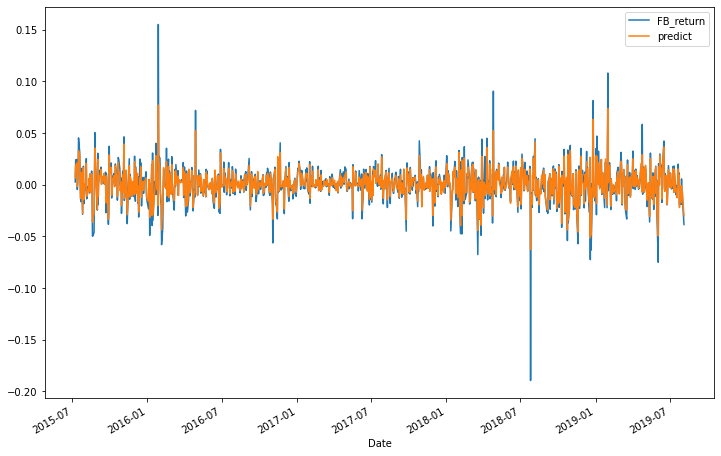

In [372]:
plt.figure(figsize = (12,8))
train_fre['FB_return'].plot(legend = True)
train_fre['predict'].plot(legend = True)

<AxesSubplot:xlabel='Date'>

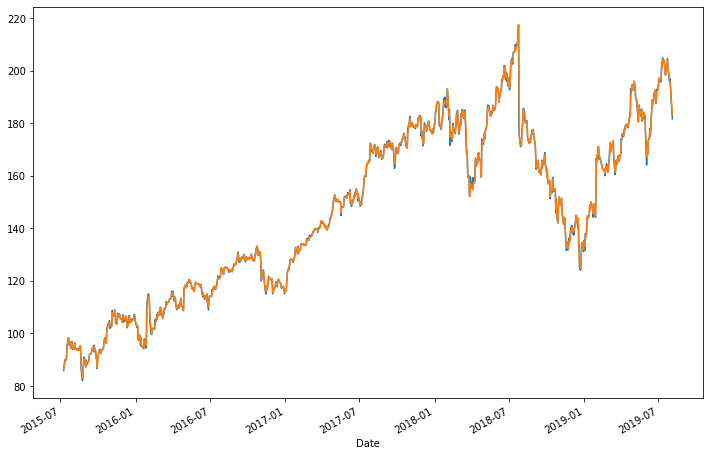

In [358]:
train_fre['predicted_FB'] = train_fre['FB_t-1'] * (1 + train_fre['predict']) 
plt.figure(figsize = (12,8))
train_fre['FB'].plot()
train_fre['predicted_FB'].plot()

In [359]:
#stock price statistics 
# train _stock price statistics 
print(mean_absolute_error(train_fre['FB'] ,train_fre['predicted_FB']))
print(mean_squared_log_error(train_fre['FB'], train_fre['predicted_FB']))

0.4903254283215639
4.83623278276383e-05


<AxesSubplot:xlabel='Date'>

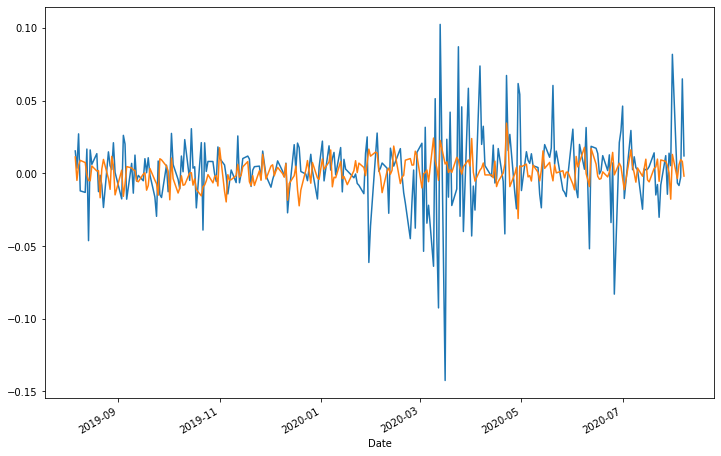

In [361]:
plt.figure(figsize = (12,8))
test_fre['FB_return'].plot()
test_fre['predict'].plot()

### Add return of longer peroid, maybe will helpful ?? 

<AxesSubplot:xlabel='Date'>

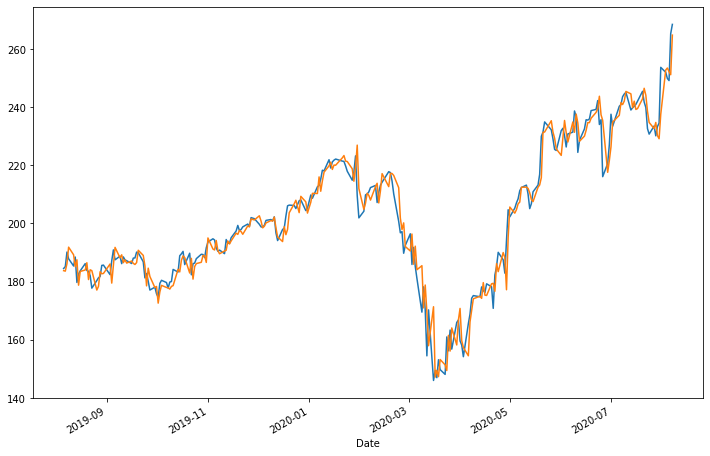

In [362]:
test_fre['predicted_FB'] = test_fre['FB_t-1'] * (1 + test_fre['predict']) 
plt.figure(figsize = (12,8))
test_fre['FB'].plot()
test_fre['predicted_FB'].plot()

In [363]:
# test stock price statistics 
# train _stock price statistics 
print(mean_absolute_error(test_fre['FB'] ,test_fre['predicted_FB']))
print(mean_squared_log_error(test_fre['FB'], test_fre['predicted_FB']))

3.6850320039010165
0.0007400725069239107


In [364]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2019-08-06 to 2020-08-07
Data columns (total 63 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Facebook.wiki_t-1   255 non-null    float64
 1   Facebook.wiki_t-2   255 non-null    float64
 2   Facebook.wiki_t-3   255 non-null    float64
 3   Google.wiki_t-1     255 non-null    float64
 4   Google.wiki_t-2     255 non-null    float64
 5   Google.wiki_t-3     255 non-null    float64
 6   Microsoft.wiki_t-1  255 non-null    float64
 7   Microsoft.wiki_t-2  255 non-null    float64
 8   Microsoft.wiki_t-3  255 non-null    float64
 9   FB_return_t-1       255 non-null    float64
 10  FB_return_t-2       255 non-null    float64
 11  FB_return_t-3       255 non-null    float64
 12  GOOGL_return_t-1    255 non-null    float64
 13  GOOGL_return_t-2    255 non-null    float64
 14  GOOGL_return_t-3    255 non-null    float64
 15  MSFT_return_t-1     255 non-null    fl

In [304]:
test_fre['FB_return'].max()

0.10234995425425542

## Model Diagnostics 

In [307]:
test_fre[test_fre['FB_return'] == test_fre['FB_return'].max()][test_columns].values

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
        154.47000122]])

In [305]:
test_fre.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2019-08-06 to 2020-08-07
Data columns (total 60 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   FB                  255 non-null    float64
 1   FB_change           255 non-null    float64
 2   Facebook.wiki_t-1   255 non-null    float64
 3   Facebook.wiki_t-2   255 non-null    float64
 4   Facebook.wiki_t-3   255 non-null    float64
 5   Google.wiki_t-1     255 non-null    float64
 6   Google.wiki_t-2     255 non-null    float64
 7   Google.wiki_t-3     255 non-null    float64
 8   Microsoft.wiki_t-1  255 non-null    float64
 9   Microsoft.wiki_t-2  255 non-null    float64
 10  Microsoft.wiki_t-3  255 non-null    float64
 11  FB_return_t-1       255 non-null    float64
 12  FB_return_t-2       255 non-null    float64
 13  FB_return_t-3       255 non-null    float64
 14  GOOGL_return_t-1    255 non-null    float64
 15  GOOGL_return_t-2    255 non-null    fl

In [306]:
test_columns = list(test_fre.columns)[20:-3]

### Modelling with all the columns 

In [312]:
train_test_split = 0.80
total_days = len(data.index)
split_week = data.index[round(total_days*(train_test_split))]
train = data[data.index <= split_week]
test = data[data.index > split_week]
print(split_week)
print(train.shape)
print(test.shape)

2019-08-05 00:00:00
(1025, 64969)
(255, 64969)


In [310]:
data.head()

FB  FB_change  Facebook.wiki_t-1  Facebook.wiki_t-2  \
Date                                                                     
2015-07-09  85.879997        0.0            45403.0            45924.0   
2015-07-10  87.949997        1.0            47202.0            45403.0   
2015-07-13  90.099998        1.0            46622.0            47202.0   
2015-07-14  89.680000        0.0            47063.0            46622.0   
2015-07-15  89.760002        0.0            44508.0            47063.0   

            Facebook.wiki_t-3  Google.wiki_t-1  Google.wiki_t-2  \
Date                                                              
2015-07-09            46947.0          45521.0          47695.0   
2015-07-10            45924.0          43295.0          45521.0   
2015-07-13            45403.0          42652.0          43295.0   
2015-07-14            47202.0          44437.0          42652.0   
2015-07-15            46622.0          45269.0          44437.0   

            Google.wiki_t-3  Microsoft.wiki_t-1  Microsoft.wiki_t-2  ...  \
Date                                                                 ...   
2015-07-09          46533.0             10472.0              7518.0  ...   
2015-07-10          47695.0              9806.0             10472.0  ...   
2015-07-13          45521.0              7816.0              9806.0  ...   
2015-07-14          43295.0              7857.0              7816.0  ...   
2015-07-15          42652.0              7314.0              7857.0  ...   

            opportunistic_(t-3)  advertiserwhile_(t-3)  leases_(t-3)  \
Date                                                                   
2015-07-09                  0.0                    0.0           0.0   
2015-07-10                  0.0                    0.0           0.0   
2015-07-13                  0.0                    0.0           0.0   
2015-07-14                  0.0                    0.0           0.0   
2015-07-15                  0.0                    0.0           0.0   

            vornados_(t-3)  farley_(t-3)  centerpiece_(t-3)  vno_(t-3)  \
Date                                                                     
2015-07-09             0.0           0.0                0.0        0.0   
2015-07-10             0.0           0.0                0.0        0.0   
2015-07-13             0.0           0.0                0.0        0.0   
2015-07-14             0.0           0.0                0.0        0.0   
2015-07-15             0.0           0.0                0.0        0.0   

            cookson_(t-3)     FB_t-1  FB_return  
Date                                             
2015-07-09            0.0  85.650002   0.002685  
2015-07-10            0.0  85.879997   0.024103  
2015-07-13            0.0  87.949997   0.024446  
2015-07-14            0.0  90.099998  -0.004661  
2015-07-15            0.0  89.680000   0.000892  

[5 rows x 64969 columns]

In [311]:
data['FB_t-1'] = data['FB'].shift(1)
data['FB_return'] = data['FB'].pct_change()
data = data.dropna()
data.head()

FB  FB_change  Facebook.wiki_t-1  Facebook.wiki_t-2  \
Date                                                                     
2015-07-10  87.949997        1.0            47202.0            45403.0   
2015-07-13  90.099998        1.0            46622.0            47202.0   
2015-07-14  89.680000        0.0            47063.0            46622.0   
2015-07-15  89.760002        0.0            44508.0            47063.0   
2015-07-16  90.849998        1.0            44555.0            44508.0   

            Facebook.wiki_t-3  Google.wiki_t-1  Google.wiki_t-2  \
Date                                                              
2015-07-10            45924.0          43295.0          45521.0   
2015-07-13            45403.0          42652.0          43295.0   
2015-07-14            47202.0          44437.0          42652.0   
2015-07-15            46622.0          45269.0          44437.0   
2015-07-16            47063.0          44688.0          45269.0   

            Google.wiki_t-3  Microsoft.wiki_t-1  Microsoft.wiki_t-2  ...  \
Date                                                                 ...   
2015-07-10          47695.0              9806.0             10472.0  ...   
2015-07-13          45521.0              7816.0              9806.0  ...   
2015-07-14          43295.0              7857.0              7816.0  ...   
2015-07-15          42652.0              7314.0              7857.0  ...   
2015-07-16          44437.0              7583.0              7314.0  ...   

            opportunistic_(t-3)  advertiserwhile_(t-3)  leases_(t-3)  \
Date                                                                   
2015-07-10                  0.0                    0.0           0.0   
2015-07-13                  0.0                    0.0           0.0   
2015-07-14                  0.0                    0.0           0.0   
2015-07-15                  0.0                    0.0           0.0   
2015-07-16                  0.0                    0.0           0.0   

            vornados_(t-3)  farley_(t-3)  centerpiece_(t-3)  vno_(t-3)  \
Date                                                                     
2015-07-10             0.0           0.0                0.0        0.0   
2015-07-13             0.0           0.0                0.0        0.0   
2015-07-14             0.0           0.0                0.0        0.0   
2015-07-15             0.0           0.0                0.0        0.0   
2015-07-16             0.0           0.0                0.0        0.0   

            cookson_(t-3)     FB_t-1  FB_return  
Date                                             
2015-07-10            0.0  85.879997   0.024103  
2015-07-13            0.0  87.949997   0.024446  
2015-07-14            0.0  90.099998  -0.004661  
2015-07-15            0.0  89.680000   0.000892  
2015-07-16            0.0  89.760002   0.012143  

[5 rows x 64969 columns]

In [313]:
train_X_all, train_y_all = train[train.columns[2:-2]], train['FB_return']
test_X_all, test_y_all = test[test.columns[2:-2]], test['FB_return']
print(train_X_all.shape, train_y_all.shape)
print(test_X_all.shape, test_y_all.shape) 

(1025, 64965) (1025,)
(255, 64965) (255,)


In [314]:
reg_2 = lgb.LGBMRegressor()

In [315]:
reg_2.fit(train_X_all, train_y_all)

LGBMRegressor()

In [316]:
y_hat_train_all = reg_2.predict(train_X_all)
print(mean_absolute_error(train_y_all, y_hat_train_all))
print(mean_squared_log_error(abs(train_y_all), abs(y_hat_train_all)))
train['predict'] = y_hat_train_all 

0.0026579291739853373
2.5234966488323556e-05


In [320]:
y_hat_test_all = reg_2.predict(test_X_all)
print(mean_absolute_error(test_y_all, y_hat_test_all))
print(mean_squared_log_error(abs(test_y_all), abs(y_hat_test_all)))
test['predict'] = y_hat_test_all

0.018462251852749426
0.00045448597477601107


<AxesSubplot:xlabel='Date'>

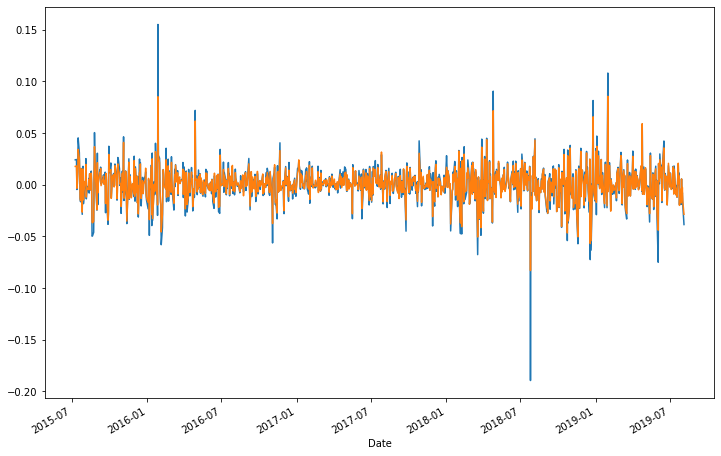

In [317]:
plt.figure(figsize = (12,8))
train['FB_return'].plot()
train['predict'].plot()

<AxesSubplot:xlabel='Date'>

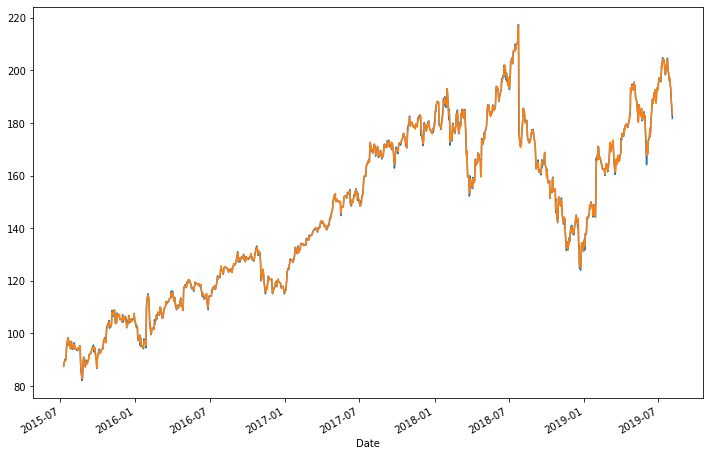

In [318]:
train['predicted_FB'] = train['FB_t-1'] * (1 + train['predict']) 
plt.figure(figsize = (12,8))
train['FB'].plot()
train['predicted_FB'].plot()

In [319]:
# train _stock price statistics 
print(mean_absolute_error(train['FB'] ,train['predicted_FB']))
print(mean_squared_log_error(train['FB'], train['predicted_FB']))

0.3798101257409284
3.251910655861199e-05


<AxesSubplot:xlabel='Date'>

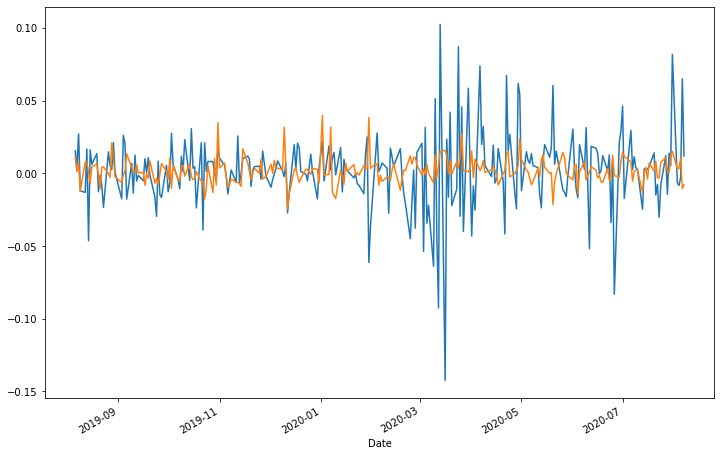

In [321]:
plt.figure(figsize = (12,8))
test['FB_return'].plot()
test['predict'].plot()

<AxesSubplot:xlabel='Date'>

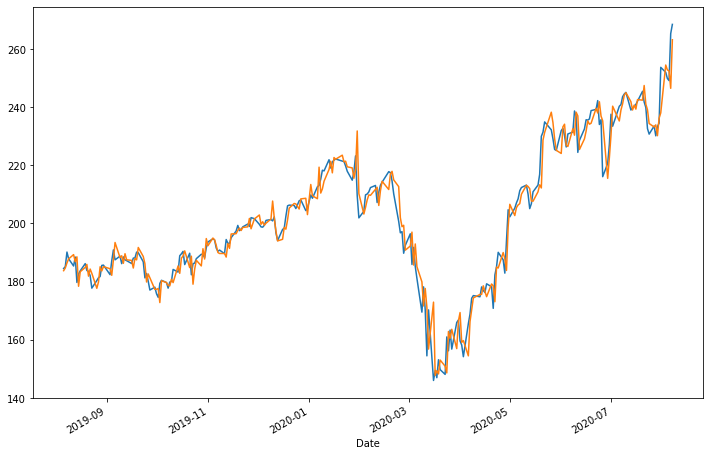

In [324]:
plt.figure(figsize = (12,8))
test['FB'].plot()
test['predicted_FB'].plot()

In [322]:
print((test['FB_t-1'] * (1+test['FB_return']) - test['FB']).sum())

-1.9895196601282805e-13


In [323]:
test['predicted_FB'] = test['FB_t-1'] * (1 + test['predict']) 

In [325]:
# test stock price statistics 
# train _stock price statistics 
print(mean_absolute_error(test['FB'] ,test['predicted_FB']))
print(mean_squared_log_error(test['FB'], test['predicted_FB']))

3.6404214461412305
0.0007481302256532297


In [326]:
test[['FB','predicted_FB']] 

FB  predicted_FB
Date                                
2019-08-06  184.509995    183.752758
2019-08-07  185.149994    184.695567
2019-08-08  190.160004    186.421015
2019-08-09  187.850006    187.804050
2019-08-12  185.369995    189.284839
...                ...           ...
2020-08-03  251.960007    254.466918
2020-08-04  249.830002    252.790001
2020-08-05  249.119995    252.464548
2020-08-06  265.279999    246.458610
2020-08-07  268.440002    263.163389

[255 rows x 2 columns]

In [365]:
data_frequent_only.to_csv('data_frequent_only.csv')

In [371]:
#test[['FB','predicted_FB']].to_csv('test.csv')

In [368]:
test.head()

FB  FB_change  Facebook.wiki_t-1  Facebook.wiki_t-2  \
Date                                                                      
2019-08-06  184.509995        1.0            26949.0            24016.0   
2019-08-07  185.149994        0.0            22963.0            26949.0   
2019-08-08  190.160004        1.0            24322.0            22963.0   
2019-08-09  187.850006       -1.0            23279.0            24322.0   
2019-08-12  185.369995       -1.0            21715.0            23279.0   

            Facebook.wiki_t-3  Google.wiki_t-1  Google.wiki_t-2  \
Date                                                              
2019-08-06            24913.0          24222.0          22258.0   
2019-08-07            24016.0          35325.0          24222.0   
2019-08-08            26949.0          26984.0          35325.0   
2019-08-09            22963.0          24476.0          26984.0   
2019-08-12            24322.0          24299.0          24476.0   

            Google.wiki_t-3  Microsoft.wiki_t-1  Microsoft.wiki_t-2  ...  \
Date                                                                 ...   
2019-08-06          25395.0              6653.0              7185.0  ...   
2019-08-07          22258.0              6824.0              6653.0  ...   
2019-08-08          24222.0              9275.0              6824.0  ...   
2019-08-09          35325.0             19954.0              9275.0  ...   
2019-08-12          26984.0              7260.0             19954.0  ...   

            leases_(t-3)  vornados_(t-3)  farley_(t-3)  centerpiece_(t-3)  \
Date                                                                        
2019-08-06           0.0             0.0           0.0                0.0   
2019-08-07           0.0             0.0           0.0                0.0   
2019-08-08           0.0             0.0           0.0                0.0   
2019-08-09           0.0             0.0           0.0                0.0   
2019-08-12           0.0             0.0           0.0                0.0   

            vno_(t-3)  cookson_(t-3)      FB_t-1  FB_return   predict  \
Date                                                                    
2019-08-06        0.0            0.0  181.729996   0.015297  0.011131   
2019-08-07        0.0            0.0  184.509995   0.003469  0.001006   
2019-08-08        0.0            0.0  185.149994   0.027059  0.006865   
2019-08-09        0.0            0.0  190.160004  -0.012148 -0.012389   
2019-08-12        0.0            0.0  187.850006  -0.013202  0.007638   

            predicted_FB  
Date                      
2019-08-06    183.752758  
2019-08-07    184.695567  
2019-08-08    186.421015  
2019-08-09    187.804050  
2019-08-12    189.284839  

[5 rows x 64971 columns]

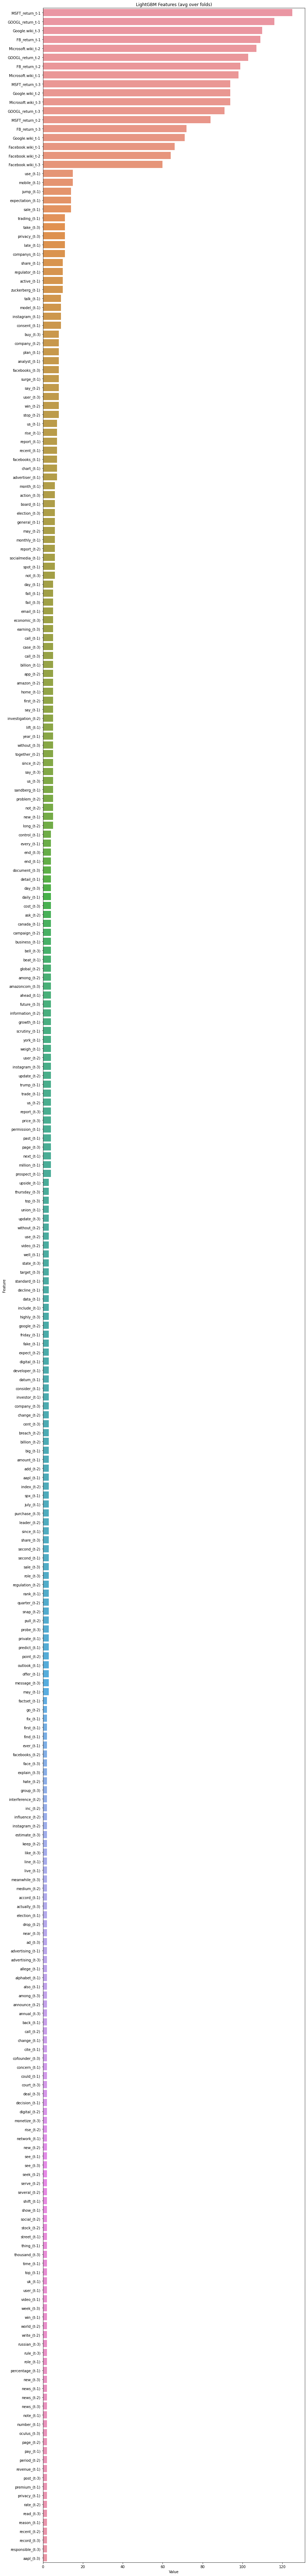

In [387]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(non_zero_importance_value , non_zero_importance_name)), columns=['Value','Feature'])

plt.figure(figsize=(12, 100))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [386]:
non_zero_importance_name = train_X_all.columns[reg_2.feature_importances_ != 0]
non_zero_importance_value = reg_2.feature_importances_ [reg_2.feature_importances_ != 0]
print(len(non_zero_importance_name))
print(len(non_zero_importance_value))

286
286
